# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,8)})

In [2]:

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

### Data Exploration

In [3]:
data.shape

(414, 7)

In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [7]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [8]:
#splitting columns into features and target
features=['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude']
    
target='price_per_unit'

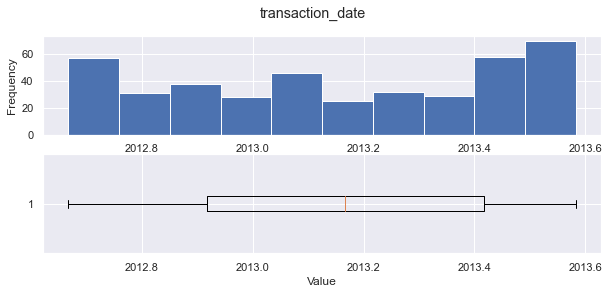

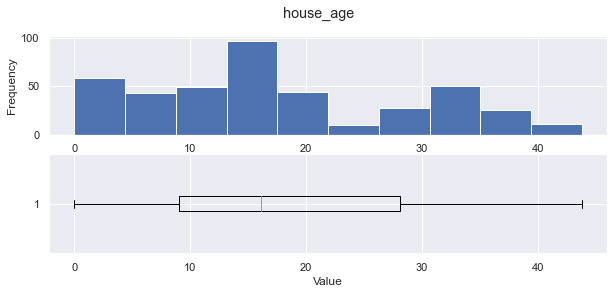

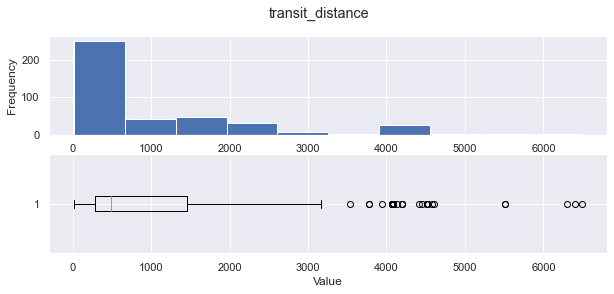

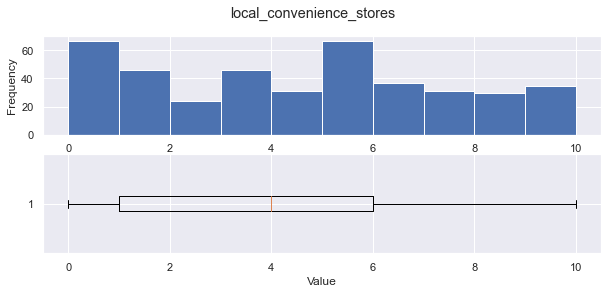

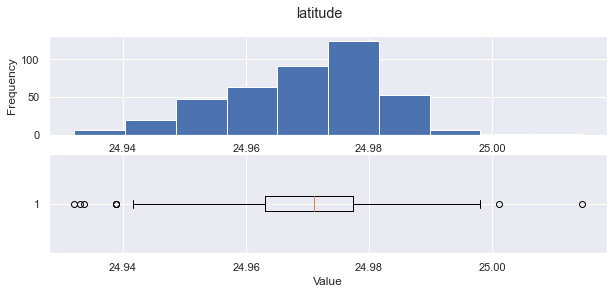

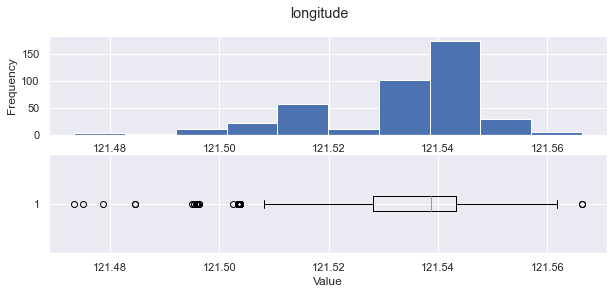

In [9]:
#plotting boxplots and histograms to show outliers in features
def show_outliers(col):

    fig,ax=plt.subplots(2,1,figsize = (10,4))

    #histogram
    ax[0].hist(col)
    ax[0].set_ylabel('Frequency')

   
    #boxplot   
    ax[1].boxplot(col, vert=False)
    ax[1].set_xlabel('Value')

    
    fig.suptitle(col.name)

  
    fig.show()


for col in features :
    show_outliers(data[col])

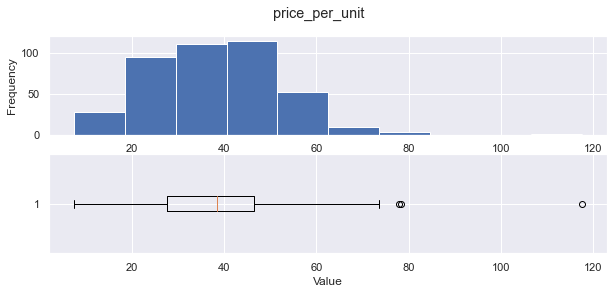

In [10]:
#plotting boxplot and histogram to show outliers in the target column
fig,ax=plt.subplots(2,1,figsize = (10,4))

#histogram
ax[0].hist(target,data=data)
ax[0].set_ylabel('Frequency')

   
#boxplot   
ax[1].boxplot(x=target,data=data, vert=False)
ax[1].set_xlabel('Value')

    
fig.suptitle(target)

  
fig.show()


Presence of outliers in the target column which needs to be cleaned!

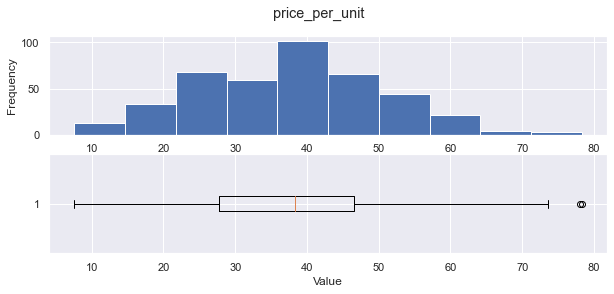

In [11]:
#cleaning the target column
data=data.query("price_per_unit<80")

#re plotting boxplot and histogram to show distribution 
fig,ax=plt.subplots(2,1,figsize = (10,4))

#histogram
ax[0].hist(target,data=data)
ax[0].set_ylabel('Frequency')

   
#boxplot   
ax[1].boxplot(x=target,data=data, vert=False)
ax[1].set_xlabel('Value')

    
fig.suptitle(target)

  
fig.show()

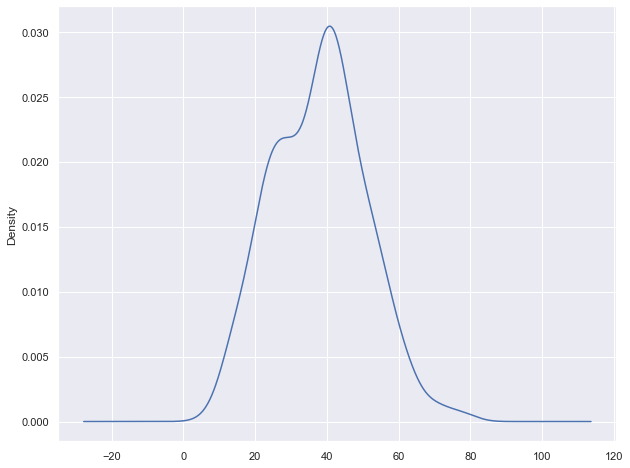

In [12]:
#density plot of target column
data['price_per_unit'].plot(kind='density');

The target data column looks somewhat skewed

### Much better

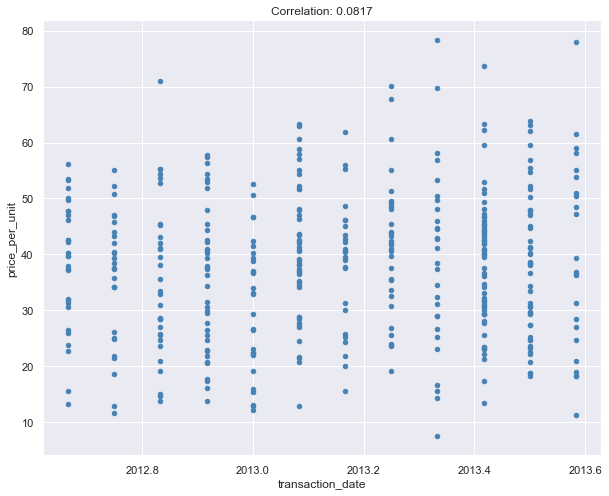

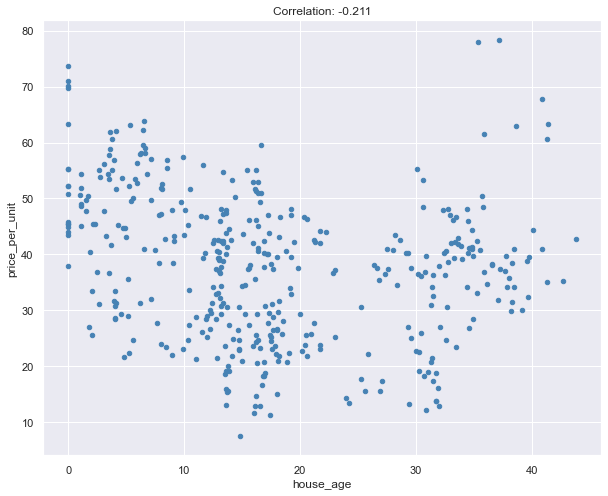

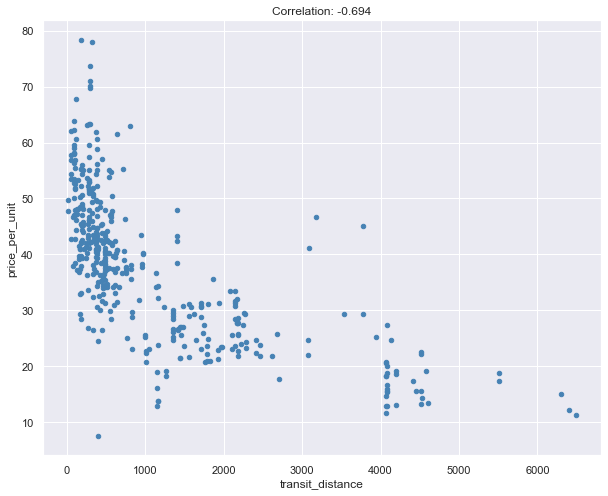

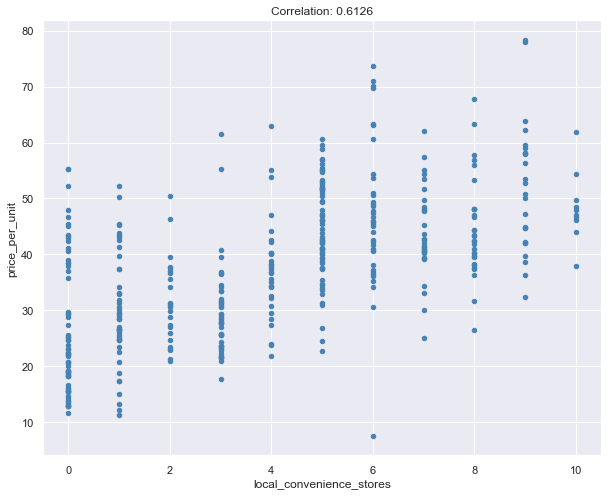

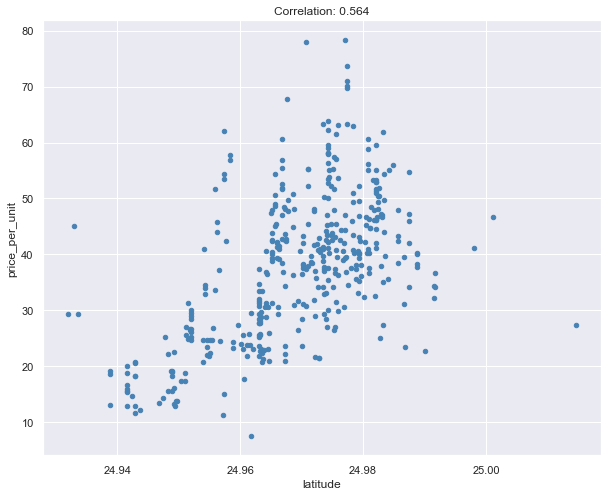

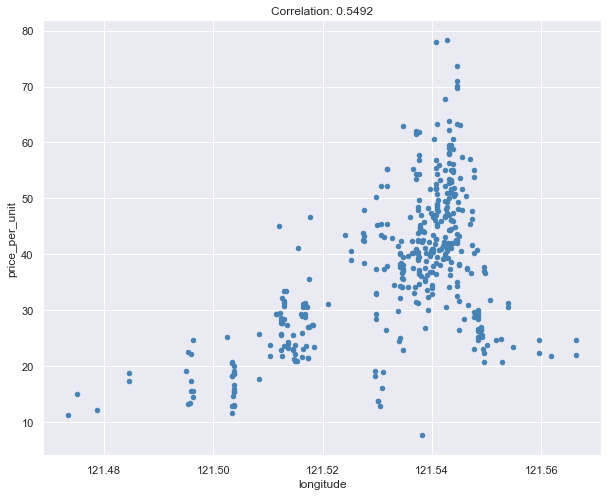

In [13]:
#scatter plots for each feature against target column which is price
for cols in features:
    data.plot(kind="scatter",x=cols,y="price_per_unit",color="steelblue")
    corr_df=data[cols].corr(data[target]).round(4)
    plt.title(f"Correlation: {corr_df}")

Insights:

> Low transit_distance tended to have high prices per unit
> Houses eastwards which is shown by the increasing longitudes had higher prices per unit.
> Similarly houses northwards shown by increasing latitudes tended to have higher prices
> High correlation between local_convenience stores and price per unit

<AxesSubplot:>

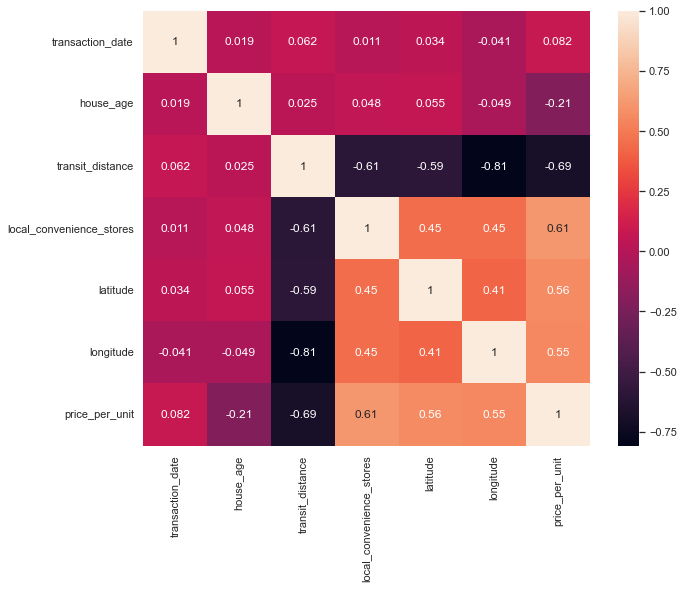

In [14]:
sns.heatmap(data.corr(),annot=True)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [16]:

X=data[features]
y=data[target]

#splitting the dataset
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f"shape of X_train is {X_train.shape}")
print(f"shape of X_test is {X_test.shape}")
print(f"shape of y_train is {y_train.shape}")
print(f"shape of y_test is {y_test.shape}")

shape of X_train is (289, 6)
shape of X_test is (124, 6)
shape of y_train is (289,)
shape of y_test is (124,)


In [17]:
#defining pipelines of various regression models
model_lr= make_pipeline(
    StandardScaler(),
    MinMaxScaler(),
    LinearRegression()
)

model_rfR= make_pipeline(
    StandardScaler(),
    MinMaxScaler(),
    RandomForestRegressor()
)

model_dTR= make_pipeline(
    StandardScaler(),
    MinMaxScaler(),
    DecisionTreeRegressor()
)

model_svm=make_pipeline(
    StandardScaler(),
    MinMaxScaler(),
    SVR(kernel='linear')
)

In [18]:
model_list=[model_lr,model_rfR,model_dTR,model_svm]
model_keys=[]
mse_list=[]
mae_list=[]
rmse_list=[]
r2_list=[]
metrics_dict={}

#iterating through the models to fit, predict and get metrics
for model in model_list:
    model.fit(X_train,y_train)
    predicted_values=model.predict(X_test)
    mse=mean_squared_error(y_test,predicted_values)
    rmse=np.sqrt(mse)
    mae=mean_absolute_error(y_test,predicted_values)
    r2=r2_score(y_test,predicted_values)
    mse_list.append(mse)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)
    mod=model.named_steps.keys()
    model_keys.append(mod)   
    metrics_dict['model']=model_keys
    metrics_dict['mse']=mse_list
    metrics_dict['mae']=mae_list
    metrics_dict['rmse']=rmse_list
    metrics_dict['r2_score']=r2_list

metrics_df=pd.DataFrame(metrics_dict)

In [19]:
metrics_df

,model,mse,mae,rmse,r2_score
0,"(standardscaler, minmaxscaler, linearregression)",65.746052,5.892463,8.108394,0.608972
1,"(standardscaler, minmaxscaler, randomforestreg...",46.630261,4.741806,6.828635,0.722664
2,"(standardscaler, minmaxscaler, decisiontreereg...",61.688649,5.675403,7.854212,0.633103
3,"(standardscaler, minmaxscaler, svr)",72.197617,6.258530,8.496918,0.570601


From the metrics, the best model is the randomforestregressor.

In [20]:
best_model=model_rfR
best_model.fit(X_train,(y_train))
predictions=best_model.predict(X_test)

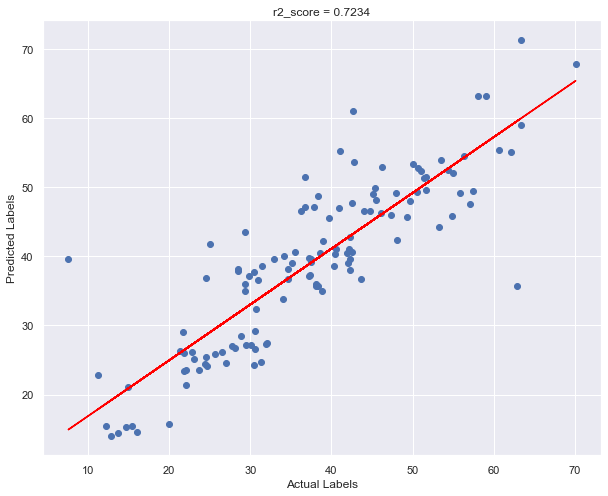

In [21]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.title(f'r2_score = {r2_score(y_test,predictions).round(4)}')
plt.show()

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [22]:
# Your code to use the trained model

In [23]:
import joblib

filename = './real_estate_model.pkl'
joblib.dump(best_model, filename)


loaded_model = joblib.load(filename)


X_feats = np.array([[2013.167,16.2,289.3248,5,24.98203,121.54348],
                  [2013.000,13.6,4082.015,0,24.94155,121.5038]])

# Using the model to predict unit price
predictions = loaded_model.predict(X_feats)

print('Predictions:')

print(f"{X_feats[0]}  {predictions[0].round(2)}")  
print(f"{X_feats[1]}  {predictions[1].round(2)}") 

Predictions:
[2013.167     16.2      289.3248     5.        24.98203  121.54348]  52.9
[2013.        13.6     4082.015      0.        24.94155  121.5038 ]  15.66
